In [62]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel, datetime
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Check the pandas version
pd.__version__

'0.16.2'

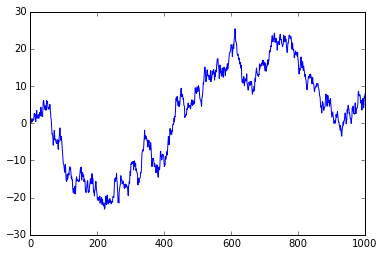

In [3]:
# To generate a random walk (Unit root)
data_random_walk = np.random.randn(1000).cumsum()
plt.plot(data_random_walk)

In [4]:
# To generate some dates (daily data)
dates = pd.date_range('2015-11-06', '2015-11-11')
series_temperature = Series([30, 28, 25, 20, 24, 25], index=dates)
series_temperature.index

DatetimeIndex(['2015-11-06', '2015-11-07', '2015-11-08', '2015-11-09',
               '2015-11-10', '2015-11-11'],
              dtype='datetime64[ns]', freq='D', tz=None)

Note that the time series's index is a datetime index. 
Now let's create temperature series for multiple cities using DataFrame.

In [5]:
series2_temperature = Series([18, 17, 17, 18, 19, 20], index=dates)
data_temperature = DataFrame({'Sydney': series_temperature, 
                              'Melbourne': series2_temperature})
data_temperature

,Melbourne,Sydney
2015-11-06,18,30
2015-11-07,17,28
2015-11-08,17,25
2015-11-09,18,20
2015-11-10,19,24
2015-11-11,20,25


Note that the *data_temperature* object is a time series data, where its index is a DataTime index.
It has two properties: 
- .index
- .columns

In [6]:
data_temperature.index

DatetimeIndex(['2015-11-06', '2015-11-07', '2015-11-08', '2015-11-09',
               '2015-11-10', '2015-11-11'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [7]:
data_temperature.columns

Index(['Melbourne', 'Sydney'], dtype='object')

You can think of DataFrame as a dictionary object of Series. 
It is very easy to manipulate series inside a DataFrame.

In [8]:
data_temperature['diff'] = data_temperature.Sydney - data_temperature.Melbourne
data_temperature

,Melbourne,Sydney,diff
2015-11-06,18,30,12
2015-11-07,17,28,11
2015-11-08,17,25,8
2015-11-09,18,20,2
2015-11-10,19,24,5
2015-11-11,20,25,5


A impoortant property is .ix[], which is very useful to select a subset of the DataFrame.

In [9]:
# To select a specific row
data_temperature.ix[2]

Melbourne    17
Sydney       25
diff          8
Name: 2015-11-08 00:00:00, dtype: int64

In [10]:
# To select a specific timestamp
idx = data_temperature.index[2]
data_temperature.ix[idx]

Melbourne    17
Sydney       25
diff          8
Name: 2015-11-08 00:00:00, dtype: int64

In [11]:
# To select specific rows and columns
data_temperature.ix[idx, 'Sydney']

25

In [12]:
# No one stops you from slicing
data_temperature.ix[idx:, ['Melbourne', 'Sydney']]

,Melbourne,Sydney
2015-11-08,17,25
2015-11-09,18,20
2015-11-10,19,24
2015-11-11,20,25


The example above is how to select the DataFrame from a timestamp onwards.

The sums, means are straight forward.

In [13]:
# To calculate the column mean
data_temperature.mean()

Melbourne    18.166667
Sydney       25.333333
diff          7.166667
dtype: float64

In [14]:
# To calculate the row mean
data_temperature.mean(1)

2015-11-06    20.000000
2015-11-07    18.666667
2015-11-08    16.666667
2015-11-09    13.333333
2015-11-10    16.000000
2015-11-11    16.666667
Freq: D, dtype: float64

In [15]:
# To calculate the mean deviation
data_temperature - data_temperature.mean()

,Melbourne,Sydney,diff
2015-11-06,-0.166667,4.666667,4.833333
2015-11-07,-1.166667,2.666667,3.833333
2015-11-08,-1.166667,-0.333333,0.833333
2015-11-09,-0.166667,-5.333333,-5.166667
2015-11-10,0.833333,-1.333333,-2.166667
2015-11-11,1.833333,-0.333333,-2.166667


In [16]:
# Selecting DataFrame using Boolean conditions
data_temperature[data_temperature.Sydney>25]

,Melbourne,Sydney,diff
2015-11-06,18,30,12
2015-11-07,17,28,11


## Reading and saving files.

In [17]:
# Check what is inside the .csv file
!head Data/USREC.csv

In [18]:
df = pd.read_csv('Data/USREC.csv')
print(df.DATE[0], type(df.DATE[0]))
df.head()
# Note that the DATE column is read as Strings

1854-12-01 <class 'str'>


,DATE,VALUE
0,1854-12-01,1
1,1855-01-01,0
2,1855-02-01,0
3,1855-03-01,0
4,1855-04-01,0


In [19]:
# You can choose how the date series can be converted.
df2 = pd.read_csv('Data/USREC.csv', parse_dates=[0])  # You need to specify the column number where the dates are
print(df2.DATE[0], type(df2.DATE[0]))

1854-12-01 00:00:00 <class 'pandas.tslib.Timestamp'>


In [20]:
# In addition, you can convert the Date column as the DataFrame index
df2 = pd.read_csv('Data/USREC.csv', parse_dates=[0], index_col=[0])
df2.head()

,VALUE
DATE,
1854-12-01,1
1855-01-01,0
1855-02-01,0
1855-03-01,0
1855-04-01,0


In [21]:
# I can do this in two steps
df2 = pd.read_csv('Data/USREC.csv', parse_dates=[0])  
df2 = df2.set_index('DATE')
df2.head()

,VALUE
DATE,
1854-12-01,1
1855-01-01,0
1855-02-01,0
1855-03-01,0
1855-04-01,0


In [22]:
# Sometimes that I want to keep the date series accessible, while converting a DataFrame to timeseries
df2 = pd.read_csv('Data/USREC.csv', parse_dates=[0])
df2 = df2.set_index('DATE', drop=False)
df2.head()

,DATE,VALUE
DATE,,
1854-12-01,1854-12-01,1
1855-01-01,1855-01-01,0
1855-02-01,1855-02-01,0
1855-03-01,1855-03-01,0
1855-04-01,1855-04-01,0


What is the name of the index? It is the first word in the second row.

In [23]:
df2.index.name

'DATE'

#### To merge dates with time

Very common that you run into datasets that date and time are recorded separately. This is how we manage them.

In [24]:
!cat Data/sample2.csv

In [25]:
df4 = pd.read_csv('Data/sample2.csv', parse_dates=[['date', 'time']])
# This is how you can combine the date and time variables together
df4.head()

,date_time,var1,var2,var3,var4
0,2015-01-11 03:23:00,0.226649,7.813904,3.176065,0.234100
1,2015-02-11 06:27:00,0.423099,9.068257,6.638828,-1.789860
2,2015-03-11 06:21:00,0.635085,7.157227,6.997226,0.220827
3,2015-04-11 06:25:00,0.671168,8.406395,6.919866,-0.594979
4,2015-05-11 04:22:00,0.879370,7.423257,4.530368,-0.096727


In [26]:
# Once again, you can set_index the DataFrame
df4 = df4.set_index('date_time')
df4.head()

,var1,var2,var3,var4
date_time,,,,
2015-01-11 03:23:00,0.226649,7.813904,3.176065,0.234100
2015-02-11 06:27:00,0.423099,9.068257,6.638828,-1.789860
2015-03-11 06:21:00,0.635085,7.157227,6.997226,0.220827
2015-04-11 06:25:00,0.671168,8.406395,6.919866,-0.594979
2015-05-11 04:22:00,0.879370,7.423257,4.530368,-0.096727


#### NumPy datetime64

It is a more advanced object that specifically dealt with time in nanoseconds level.

 - 8 byte dtype in NumPy, many datetime unites
 - datetime64[ns]: nanosecond units
 - Represents ~600 year timespan, from 1700-2300
 - Nanoseconds important in some applications

#### DatetimeIndex: a collection of pandas.TimeStamp()
 - Axis index for pandas objects
 - Arrays of datetime64[ns] values under the hood

#### pandas.TimeStamp

It is a subset of datetime.datetime()

In [27]:
pd.Timestamp.mro() # Timestamp is a sub-class of datetime.datetime

[pandas.tslib.Timestamp,
 pandas.tslib._Timestamp,
 datetime.datetime,
 datetime.date,
 object]

In [28]:
stamp = pd.Timestamp('2015-11-11 10:05:12')
print(stamp.year)
print(stamp.month)
print(stamp.day)
print(stamp.hour, stamp.minute, stamp.second)
stamp.strftime('%Y%m%d') # You can output any formats

2015
11
11
10 5 12


'20151111'

In [29]:
# In essence, the time stamp is recorded in nanosecond level.
stamp.value

1447236312000000000

In [30]:
# We can generate a pd.Timestamp from datetime.datetime() as well.
pd.Timestamp(pd.to_datetime('17/1/2015 10:12:13'))

Timestamp('2015-01-17 10:12:13')

In [31]:
# There are a number of ways that you can parse strings to DatetimeIndex
dates = ['2015-11-01', '2015-11-05', '2015-11-10']
pd.DatetimeIndex(dates)

DatetimeIndex(['2015-11-01', '2015-11-05', '2015-11-10'], dtype='datetime64[ns]', freq=None, tz=None)

In [32]:
# DatetimeIndex is just a collection of pd.Timestamp
print(type(pd.DatetimeIndex(dates)[0]))

<class 'pandas.tslib.Timestamp'>


## Construct a timeseries

In [33]:
ts = DataFrame(np.arange(3), index=pd.to_datetime(dates))
ts.index[0]
# Use pd.DatetimeIndex

Timestamp('2015-11-01 00:00:00')

In [34]:
isinstance(ts.index[0], pd.datetime)

True

## Indexing

In [35]:
rng = pd.date_range('2015-11-11', periods=1000) # Generate a fixed-frequency timestamp as datetimeIndex
rng

DatetimeIndex(['2015-11-11', '2015-11-12', '2015-11-13', '2015-11-14',
               '2015-11-15', '2015-11-16', '2015-11-17', '2015-11-18',
               '2015-11-19', '2015-11-20', 
               ...
               '2018-07-28', '2018-07-29', '2018-07-30', '2018-07-31',
               '2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04',
               '2018-08-05', '2018-08-06'],
              dtype='datetime64[ns]', length=1000, freq='D', tz=None)

In [36]:
ts = Series(np.arange(1000), index=rng)
ts.head(10)

2015-11-11    0
2015-11-12    1
2015-11-13    2
2015-11-14    3
2015-11-15    4
2015-11-16    5
2015-11-17    6
2015-11-18    7
2015-11-19    8
2015-11-20    9
Freq: D, dtype: int64

In [38]:
# To select a specific row using date and time information
ts[datetime(2015, 12, 12)]

31

In [40]:
# Or just select that row
ts[31]

31

In [42]:
# Or select that row by passing its timestamp
ts[ts.index[31]]

31

In [44]:
# Or passing in the string of dates
ts['2015-12-12']

31

In [46]:
# Select dates up to 2015-12-12
ts[:'2015-12-12']
# Note that end-points are inclusive

2015-11-11     0
2015-11-12     1
2015-11-13     2
2015-11-14     3
2015-11-15     4
2015-11-16     5
2015-11-17     6
2015-11-18     7
2015-11-19     8
2015-11-20     9
2015-11-21    10
2015-11-22    11
2015-11-23    12
2015-11-24    13
2015-11-25    14
2015-11-26    15
2015-11-27    16
2015-11-28    17
2015-11-29    18
2015-11-30    19
2015-12-01    20
2015-12-02    21
2015-12-03    22
2015-12-04    23
2015-12-05    24
2015-12-06    25
2015-12-07    26
2015-12-08    27
2015-12-09    28
2015-12-10    29
2015-12-11    30
2015-12-12    31
Freq: D, dtype: int64

In [56]:
# You can even specify a specific time in your search
ts['2015-12-01 07:00': '2015-12-8 12:00']

2015-12-02    21
2015-12-03    22
2015-12-04    23
2015-12-05    24
2015-12-06    25
2015-12-07    26
2015-12-08    27
Freq: D, dtype: int64

#### Quickly select monthly/yearly data from daily data

In [55]:
# selecting a whole month
ts['2015-12']

2015-12-01    20
2015-12-02    21
2015-12-03    22
2015-12-04    23
2015-12-05    24
2015-12-06    25
2015-12-07    26
2015-12-08    27
2015-12-09    28
2015-12-10    29
2015-12-11    30
2015-12-12    31
2015-12-13    32
2015-12-14    33
2015-12-15    34
2015-12-16    35
2015-12-17    36
2015-12-18    37
2015-12-19    38
2015-12-20    39
2015-12-21    40
2015-12-22    41
2015-12-23    42
2015-12-24    43
2015-12-25    44
2015-12-26    45
2015-12-27    46
2015-12-28    47
2015-12-29    48
2015-12-30    49
2015-12-31    50
Freq: D, dtype: int64

#### How to get a sorted timeseries

In [53]:
ts2 = ts.take(np.random.permutation(len(ts)))
ts2 = ts2.sort_index()
ts2.head()

2015-11-11    0
2015-11-12    1
2015-11-13    2
2015-11-14    3
2015-11-15    4
dtype: int64

In [59]:
df = DataFrame(np.arange(4000).reshape((1000, 4)),
         index=rng, columns=['Sydney', 'Melbourne', "Brisbane", 'Manly'])
df.head()

,Sydney,Melbourne,Brisbane,Manly
2015-11-11,0,1,2,3
2015-11-12,4,5,6,7
2015-11-13,8,9,10,11
2015-11-14,12,13,14,15
2015-11-15,16,17,18,19


In [61]:
# Again, you can quickly choose a month using .ix[] method
df.ix['2015-12']

,Sydney,Melbourne,Brisbane,Manly
2015-12-01,80,81,82,83
2015-12-02,84,85,86,87
2015-12-03,88,89,90,91
2015-12-04,92,93,94,95
2015-12-05,96,97,98,99
2015-12-06,100,101,102,103
2015-12-07,104,105,106,107
2015-12-08,108,109,110,111
2015-12-09,112,113,114,115
2015-12-10,116,117,118,119


## Incorporating calculations in the timestamp

In [65]:
start = datetime(2015, 11, 5)
df[start:start + timedelta(11)] # We are looking for up to the date 2015-11-16

,Sydney,Melbourne,Brisbane,Manly
2015-11-11,0,1,2,3
2015-11-12,4,5,6,7
2015-11-13,8,9,10,11
2015-11-14,12,13,14,15
2015-11-15,16,17,18,19
2015-11-16,20,21,22,23


In [67]:
# Without using datetime.timedelta(), you can use pandas.offsets.Day()
df[start:start + pd.offsets.Day(11)]

,Sydney,Melbourne,Brisbane,Manly
2015-11-11,0,1,2,3
2015-11-12,4,5,6,7
2015-11-13,8,9,10,11
2015-11-14,12,13,14,15
2015-11-15,16,17,18,19
2015-11-16,20,21,22,23


## A closer look at pd.date_range()

In [69]:
# The default behaviour of pd.date_range() is to generate calendar days
pd.date_range('2015-11-11', periods=5)

DatetimeIndex(['2015-11-11', '2015-11-12', '2015-11-13', '2015-11-14',
               '2015-11-15'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [72]:
# You can generate frequencies at Month End
pd.date_range('2015-11-11', periods=5, freq='M')

DatetimeIndex(['2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31'],
              dtype='datetime64[ns]', freq='M', tz=None)

In [74]:
# You can generate frequencies with business days
pd.date_range('2015-11-11', periods=5, freq='B')

DatetimeIndex(['2015-11-11', '2015-11-12', '2015-11-13', '2015-11-16',
               '2015-11-17'],
              dtype='datetime64[ns]', freq='B', tz=None)

In [76]:
# Or Business first week day of the month
pd.date_range('2015-11-11', periods=5, freq='BMS')

DatetimeIndex(['2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01'],
              dtype='datetime64[ns]', freq='BMS', tz=None)

In [78]:
# How about finding all weekly days on Saturdays
pd.date_range('2015-11-11', periods=5, freq='W-SAT')

DatetimeIndex(['2015-11-14', '2015-11-21', '2015-11-28', '2015-12-05',
               '2015-12-12'],
              dtype='datetime64[ns]', freq='W-SAT', tz=None)

In [83]:
# Annual days following the last day of Feburary (business day only)
pd.date_range('2015-11-11', periods=10, freq='BA-FEB')

DatetimeIndex(['2016-02-29', '2017-02-28', '2018-02-28', '2019-02-28',
               '2020-02-28', '2021-02-26', '2022-02-28', '2023-02-28',
               '2024-02-29', '2025-02-28'],
              dtype='datetime64[ns]', freq='BA-FEB', tz=None)

In [84]:
# Finding the 3rd Friday of each month
pd.date_range('2015-11', periods=5, freq='WOM-3FRI') # WOM stands for week of month

DatetimeIndex(['2015-11-20', '2015-12-18', '2016-01-15', '2016-02-19',
               '2016-03-18'],
              dtype='datetime64[ns]', freq='WOM-3FRI', tz=None)